# I - Maps
These notes are based on the paper Gregobi et. al., Strange attractors that are not chaotic, Physica 13D (1984). 

We will start understanding strange non-chaotic attractors by understanding the dynamics of the map,

\begin{align*}
x_{n+1} &= f(x_n,\theta_n) \\
\theta_{n+1} &= [\theta_n + 2\pi\omega] \text{ mod } 2\pi 
\end{align*}

where $f$ is $2\pi$ periodic in $\theta$ and $\omega = \frac{\sqrt{5} - 1}{2}$.

For simplicity, the easier case to consider is when $x_n$ is a scalar and $f(x,\theta) = 2 \lambda \tanh(x) \cos(\theta)$.

The Lyapunov exponent for $x$ is,

$$ h = \lim_{m \to \infty} \left\{ \frac{1}{m} \sum_{n=1}^m \ln \left| \frac{\partial f}{\partial x} \right|_{x_n,\theta_n} \right\} $$

while the Lyapunov exponent for $\theta$ is zero.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import jit, njit

## Plot for the function f

In [106]:
@njit
def f(x,theta,lam):
    return 2*lam*np.tanh(x)*np.cos(theta)

@njit
def df_dx(x,theta,lam):
    return 2*lam*np.cos(theta)/(np.cosh(x)**2)

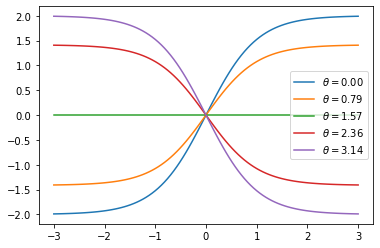

In [107]:
x_vec = np.linspace(-3,3,100)
theta_vec = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
lam = 1

for theta in theta_vec:
    plt.plot(x_vec,f(x_vec,theta,lam),label=r"$\theta = $" + "{:.2f}".format(theta))
plt.legend()

## Orbit of a single point

In [208]:
lam = 1.5
omega = 0.5*(np.sqrt(5) - 1)
x0, theta0 = 0.1, np.pi
num_iter = 10000

y_vec = []
y_vec.append([x0,theta0])
for ind in range(num_iter):
    x_new = f(y_vec[-1][0],y_vec[-1][1],lam)
    theta_new = 2*np.pi*np.modf(y_vec[-1][1]/(2*np.pi) + omega)[0]
    y_vec.append([x_new,theta_new])
y_vec = np.array(y_vec)

(-3.0, 3.0)

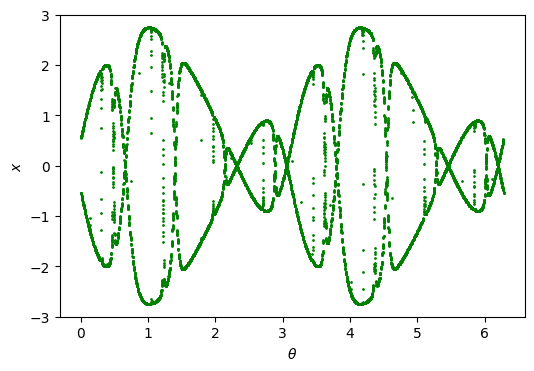

In [209]:
plt.figure(dpi=100)
plt.scatter(y_vec[:,1],y_vec[:,0],s=1,color='g')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$x$")
plt.ylim([-2*lam,2*lam])

## Lyapynov exponent for an orbit
Calculated using the analytic form for f

In [179]:
lyapunov = np.mean(np.log(np.abs(df_dx(y_vec[:,0],y_vec[:,1],lam))))
print("Lyapunov exp.",lyapunov)
print("Analytic log(lam) [valid only for x0 = 0]",np.log(lam))

Lyapunov exp. -1.0472095674737052
Analytic log(lam) [valid only for x0 = 0] 0.4054651081081644


## Attractor
This is constructed by choosing different initial conditions and looking at the final point. Ergodicity ensures the attractor picture is same as the one found by iterating one generic point forward in time.

In [141]:
@njit
def iterate_f(x0,theta0,lam,omega,num_iter):
    for ind in range(num_iter):
        x_new = f(x0,theta0,lam)
        theta_new = 2*np.pi*((theta0/(2*np.pi) + omega)  - np.int(theta0/(2*np.pi) + omega))
        x0,theta0 = x_new,theta_new
    return [x_new,theta_new]

In [163]:
lam = 1.5
omega = 0.5*(np.sqrt(5) - 1)
x_vec = np.linspace(-2*lam,2*lam,1000) 
theta_vec = np.linspace(0,2*np.pi,1000) 

num_iter = 50
final_pts = []
for theta0 in theta_vec:
    for x0 in x_vec: 
        final_pt = iterate_f(x0,theta0,lam,omega,num_iter)
        final_pts.append(final_pt)
final_pts = np.array(final_pts)

(0.0, 6.283185307179586)

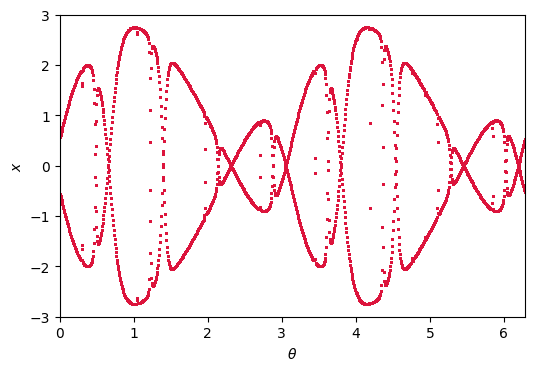

In [176]:
plt.figure(dpi=100)
plt.scatter(final_pts[:,1],final_pts[:,0],s=1,color='crimson')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$x$")
plt.ylim([-2*lam,2*lam])
plt.xlim([0,2*np.pi])

# Orbit of a horizontal line

In [235]:
lam = 1.5
omega = 0.5*(np.sqrt(5) - 1)
theta_vec = np.linspace(0,2*np.pi,1000) 

num_iter = 2
final_pts = []
x_vec = [-2*lam,2*lam]
for theta0 in theta_vec:
    for x0 in x_vec: 
        final_pt = iterate_f(x0,theta0,lam,omega,num_iter)
        final_pts.append(final_pt)
final_pts = np.array(final_pts)

(0.0, 6.283185307179586)

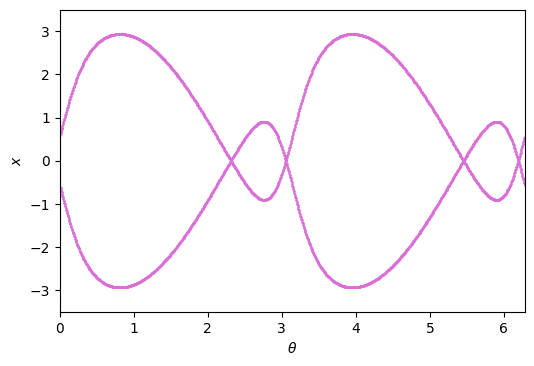

In [236]:
plt.figure(dpi=100)
plt.scatter(final_pts[:,1],final_pts[:,0],s=1,color='orchid')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$x$")
plt.ylim([-2*lam-0.5,2*lam+0.5])
plt.xlim([0,2*np.pi])